# Allele frequencies in <em>Statisticus bayesiani</em>

Let's say we live in a magical world where populations actually are in Hardy-Weinberg equilibrium. We have a population of Bayes beetles, <em>Statisticus bayesiani</em>, and we're interested in the frequency of the allele controlling wing veining. The dominant trait (W) is branched veining, and the recessive trait (w) is parallel veining.

We don't actually know how the alleles are distributed in the population, because all we can observe are <em>phenotypes</em>, not <em>genotypes</em>. But, if our population is in H-W equilibrium, we should be able to use the Metropolis algorithm to get those allele frequencies!

We'll be using Bayes' theorem, which, to remind you, is

## $Posterior = \frac{Likelihood * Prior}{Average\text{ }Likelihood}$

And when we blend that with the Metropolis algorithm, that will look like 

## $Posterior = \frac{Likelihood\text{ }@\text{ }our\text{ }proposal}{Likelihood\text{ }@\text{ }our\text{ }current}$

So let's just make an assumption---that is, we'll define our prior. Let's assume that we have a uniform distribution---that is, each beetle is equally likely to have a dominant allele. Instead of a bell curve, this is going to look like a box.

In [6]:
def prior(p):
    if p < 0 or p > 1:
        return 0
    else:
        return 1

Then, we're going to define our likelihood. For us, that's the H-W Equilibrium equation:

## $p^{2*n_{AA}}+ 2pq^{n_{Aa}} + q^{2*n_{aa}}$

where $n_{AA}$ is the number of homozygous dominant beetles, $n_{Aa}$ is the number of hets, and $n_{aa}$ are the homozygous recessive beetles. Now, to remind you, we do not know the actual numbers of homozygous dominant, heterozygous, or homozygous recessive beetles! Those are numbers we have to suggest.

In [7]:
def likelihood(p, numDom, numHet, numRec):
    q = 1-p
    hweq = p**(2*numDom) + (2*p*q)**numHet + q**(2*numRec)
    return hweq

Great! Now we're gonna Metropolis all of that! Below is the function, and you'll notice it is virtually the same as the function we used with King Markov. The comments are all the same to make that comparison extra clear for you.

In [8]:
def metropolis(numDom, numHet, numRec, niter, guessP, conf):
    p = np.zeros(niter) # Right now, the king hasn't been anywhere, so the record of his positions is a whole bunch of 0's.
    p[0] = guessP # The king is currently on island 10.

    for i in range(1, niter): # Each week...
        currentP = p[i-1] # The king is where he is right now
        newP = currentP + np.random.normal(0, conf) # flip the coin. 
        proposal = prior(newP)*likelihood(newP,numDom, numHet, numRec) # Pull out our shells
        current = prior(currentP) * likelihood(currentP,numDom, numHet, numRec) # and our stones
        probMove = proposal/current
        unifSamp = np.random.ranf() # Load our decision bag
        if unifSamp < float(probMove): # If we should move ... 
            p[i] = newP # ... then move!
        else:
            p[i] =  currentP # Otherwise, stay!
    return p

Great! So now we have all our functions defined. We just have to decide what we're going to pass those functions. We have to decide what numbers to give for $n_{AA}$, $n_{Aa}$, and $n_{aa}$. We also have to give an actual proposal $p$, called `guessP` in our function, and decide how confidently we feel about that $p$, called `conf` in our function.

In [11]:
# Import the packages we need
import numpy as np # Lets us easily work with arrays
import matplotlib.pyplot as plt # Lets us plot our data

## Set our values and go for it.
n_AA = 50
n_Aa = 21
n_aa = 29
niter = 10000 # Choose your favorite number. Big numbers are more accurate, but take longer.
beetles = metropolis(n_AA, n_Aa, n_aa, , niter, 0.5, 0.01)
mu = np.mean(beetles)
sigma = np.std(beetles)
print("Mean frequency of our dominant allele: " + str(mu) + "\nStandard Deviation: " + str(sigma))

Mean frequency of our dominant allele: 0.49647771124863094
Standard Deviation: 0.07082102971133265


Amazing! We did it! Now let's plot.

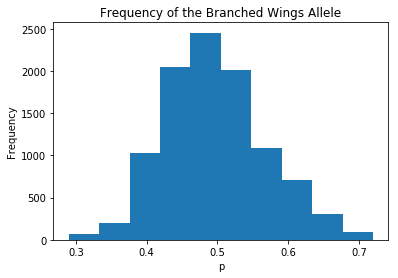

In [13]:
plt.hist(beetles)
plt.xlabel('p')
plt.ylabel('Frequency')
plt.title("Frequency of the Branched Wings Allele")
plt.show()

Easy as that! Now's the time to play around---try changing our inital values for allele frequency, `guessP`, and `conf`. 
1. What happens when `guessP` is very close to 1 or 0? 
2. What happens when `conf` is very large? 
3. What happens with fewer runs of the algorithm? Make `niter` 100 and find out. 
4. What about with tons and tons of runs? Make `niter` 100000000 and find out!